In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kruskal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import geopy.distance
from sklearn.preprocessing import OneHotEncoder

In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv" )

In [4]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [5]:
data.shape

(3376, 46)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
data.duplicated().sum()


0

In [8]:
data[['NumberofBuildings']].sum()
#nombre de batiment total

NumberofBuildings    3728.0
dtype: float64

# Données manquantes 

In [9]:
def missing_values_by_column1(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "sum" par colonne pour compter les valeurs manquantes par colonne
    missing_values_count = missing_values.sum()
    return missing_values_count

In [10]:
missing_values_by_column1(data)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [11]:
missing_values_by_column1(data).sum()     #total des données manquantes 

19952

In [12]:
def missing_values_proportion(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "mean" pour calculer la proportion de valeurs manquantes par colonne
    missing_values_proportion = missing_values.mean()
    return missing_values_proportion


In [13]:
missing_values_proportion(data)

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.004739
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.002666
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA       

- on peut observer que la colonne Comments est completement vide
- outliers est presque completement vide 

In [14]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

# BuildingType

nous recherchons uniquement les bâtiments non destinés à l’habitation.

In [15]:


data.BuildingType.unique()


array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

- Apres une recherche internet, SPS-District K-12 est Seattle public school District. c'est une école qui n'est donc pas destiné a l'habitation.
- Les habitation contenant 'Multifamily' sont donc a supprimer.

In [16]:
data2 = data[~data['BuildingType'].str.contains("Multifamily ")]


In [17]:
data2


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [18]:
data2.shape

(1668, 46)

le nombre de batiments à presque été diviser par 2.

In [19]:
missing_values_proportion(data2)

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.009592
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.001199
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.001199
LargestPropertyUseType             0.003597
LargestPropertyUseTypeGFA       

nous allons supprimer les colonnes qui ont plus de 90% de donnée manquante 

In [20]:
def colonne_NAN(data, taux):
  NAN_rate = ((data.isnull().sum() / data.shape[0])*100).sort_values(ascending=False).reset_index()
  NAN_rate.columns = ['Variable','Taux_de_Null']
  NANs_rate = NAN_rate[NAN_rate.Taux_de_Null >= taux]
  return NANs_rate

In [21]:
#taux de nan par colonne 
tauxNAN = colonne_NAN(data2, 0)
tauxNAN.head(10)

,Variable,Taux_de_Null
0,Comments,100.000000
1,Outlier,98.980815
2,YearsENERGYSTARCertified,94.124700
3,ThirdLargestPropertyUseType,78.836930
4,ThirdLargestPropertyUseTypeGFA,78.836930
5,SecondLargestPropertyUseType,48.741007
6,SecondLargestPropertyUseTypeGFA,48.741007
7,ENERGYSTARScore,34.412470
8,ZipCode,0.959233
9,LargestPropertyUseType,0.359712


In [22]:
data3 = data2.drop(["Comments", "Outlier","YearsENERGYSTARCertified",'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA'], axis=1)

In [23]:
 data3

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [24]:
data3['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [25]:
## differents types de batiments 

data3['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

# Choix des colonnes 

In [26]:
data3.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [27]:
data4 = data3[[ 'BuildingType','PrimaryPropertyType','YearBuilt',
       'NumberofFloors', 'PropertyGFATotal','LargestPropertyUseType', 
        'Neighborhood','Latitude', 'Longitude',
        'NumberofBuildings',
       'ENERGYSTARScore','SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 
       'Electricity(kBtu)',  'NaturalGas(kBtu)',
  'TotalGHGEmissions',
       'GHGEmissionsIntensity'
      ]]
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57


In [28]:
missing_values_by_column1(data4)

BuildingType                0
PrimaryPropertyType         0
YearBuilt                   0
NumberofFloors              0
PropertyGFATotal            0
LargestPropertyUseType      6
Neighborhood                0
Latitude                    0
Longitude                   0
NumberofBuildings           2
ENERGYSTARScore           574
SiteEUI(kBtu/sf)            3
SourceEUI(kBtu/sf)          2
SiteEnergyUse(kBtu)         2
SteamUse(kBtu)              2
Electricity(kBtu)           2
NaturalGas(kBtu)            2
TotalGHGEmissions           2
GHGEmissionsIntensity       2
dtype: int64

In [29]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            1668 non-null   object 
 1   PrimaryPropertyType     1668 non-null   object 
 2   YearBuilt               1668 non-null   int64  
 3   NumberofFloors          1668 non-null   int64  
 4   PropertyGFATotal        1668 non-null   int64  
 5   LargestPropertyUseType  1662 non-null   object 
 6   Neighborhood            1668 non-null   object 
 7   Latitude                1668 non-null   float64
 8   Longitude               1668 non-null   float64
 9   NumberofBuildings       1666 non-null   float64
 10  ENERGYSTARScore         1094 non-null   float64
 11  SiteEUI(kBtu/sf)        1665 non-null   float64
 12  SourceEUI(kBtu/sf)      1666 non-null   float64
 13  SiteEnergyUse(kBtu)     1666 non-null   float64
 14  SteamUse(kBtu)          1666 non-null   

In [30]:
data4.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.000000,1.668000e+03,1668.000000,1668.000000,1666.000000,1094.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,1666.000000
mean,1961.913669,4.121103,1.188427e+05,47.616054,-122.332908,1.168667,65.449726,72.158799,175.829892,8.437933e+06,5.125726e+05,5.843493e+06,1.970845e+06,184.973301,1.607845
std,32.741755,6.563407,2.973622e+05,0.048168,0.024580,2.931409,28.492928,74.048129,185.932121,3.024380e+07,5.513944e+06,2.079673e+07,9.370814e+06,751.976001,2.336882
min,1900.000000,0.000000,1.128500e+04,47.499170,-122.411820,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,1930.000000,1.000000,2.947775e+04,47.585458,-122.343280,1.000000,48.000000,33.700001,76.450001,1.229291e+06,0.000000e+00,7.213255e+05,0.000000e+00,19.967500,0.350000
50%,1965.000000,2.000000,4.928950e+04,47.612340,-122.332935,1.000000,73.000000,51.900002,130.949997,2.554947e+06,0.000000e+00,1.611881e+06,4.982630e+05,49.580000,0.880000
75%,1989.000000,4.000000,1.053250e+05,47.649675,-122.321675,1.000000,89.000000,81.699997,203.950001,6.913348e+06,0.000000e+00,4.847589e+06,1.520000e+06,142.382500,1.890000
max,2015.000000,99.000000,9.320156e+06,47.733870,-122.258640,111.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [31]:
bat2 = data4[['NumberofFloors']]

In [32]:
bat2.describe()

,NumberofFloors
count,1668.000000
mean,4.121103
std,6.563407
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,99.000000


In [33]:
bat = bat2 > 76
nombre_bat = bat.sum().sum()
nombre_bat

1

In [34]:
data4 = data4[~((data4['NumberofFloors'] > 76))]
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57


In [35]:
bat0 = data4.loc[data4['NumberofFloors'] == 0]
bat0 

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
166,NonResidential,Hotel,1999,0,934292,Hotel,DOWNTOWN,47.61275,-122.33330,1.0,NaN,117.900002,272.899994,6.504728e+07,0.0,39364114.0,25683162.0,1638.46,1.75
487,NonResidential,Medical Office,2004,0,225982,Medical Office,EAST,47.60979,-122.32298,1.0,53.0,102.699997,246.899994,2.056062e+07,7815663.0,12744957.0,0.0,692.12,3.06
488,NonResidential,Mixed Use Property,2006,0,516407,Parking,DOWNTOWN,47.61783,-122.33729,0.0,31.0,76.300003,199.199997,3.940332e+07,0.0,29432803.0,9970512.0,734.72,1.42
564,NonResidential,Other,1999,0,947987,Other - Mall,DOWNTOWN,47.61289,-122.33531,1.0,NaN,62.299999,195.600006,4.651096e+07,0.0,46510954.0,0.0,324.25,0.34
1754,NonResidential,Medical Office,1945,0,274568,Medical Office,EAST,47.60862,-122.32372,1.0,52.0,111.000000,235.500000,2.531153e+07,13296249.0,12015275.0,0.0,1110.07,4.04
1993,Campus,Other,1991,0,230971,Other,GREATER DUWAMISH,47.59042,-122.32498,10.0,NaN,91.000000,235.100006,2.102229e+07,0.0,15419770.0,5602515.0,405.05,1.75
3130,NonResidential,Warehouse,1940,0,384772,Non-Refrigerated Warehouse,NORTHEAST,47.68454,-122.26235,1.0,69.0,36.700001,84.099998,1.520676e+07,0.0,9014872.0,6191888.0,391.70,1.02
3131,NonResidential,Medical Office,1960,0,30287,Medical Office,NORTHEAST,47.68240,-122.26223,1.0,32.0,78.199997,217.399994,2.193115e+06,0.0,1815405.0,377710.0,32.72,1.08
3132,NonResidential,Small- and Mid-Sized Office,1960,0,21931,Office,NORTHEAST,47.68254,-122.26299,1.0,32.0,124.000000,221.899994,3.947209e+06,0.0,1398591.0,2548619.0,145.11,6.62
3168,Nonresidential COS,Other,1929,0,502030,Other - Recreation,NORTHEAST,47.68212,-122.26330,8.0,NaN,32.700001,69.000000,1.847034e+07,0.0,9359884.0,9110455.0,549.11,1.09


In [36]:
medianefloor = data4['NumberofFloors'].median()
data4['NumberofFloors'] = data4['NumberofFloors'].replace(0, medianefloor)
data4.describe()

C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\2087678496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['NumberofFloors'] = data4['NumberofFloors'].replace(0, medianefloor)


,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1667.000000,1667.000000,1.667000e+03,1667.000000,1667.000000,1665.000000,1093.000000,1664.000000,1665.000000,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03,1665.000000,1665.000000
mean,1961.904619,4.083383,1.189008e+05,47.616093,-122.332926,1.168769,65.436414,72.193209,175.907508,8.442805e+06,5.128804e+05,5.846807e+06,1.972028e+06,185.083033,1.608751
std,32.749493,6.130210,2.974420e+05,0.048156,0.024576,2.932286,28.502568,74.057071,185.960982,3.025224e+07,5.515586e+06,2.080253e+07,9.373504e+06,752.188579,2.337292
min,1900.000000,1.000000,1.128500e+04,47.499170,-122.411820,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,1930.000000,1.000000,2.950300e+04,47.585500,-122.343280,1.000000,48.000000,33.700001,76.599998,1.232823e+06,0.000000e+00,7.224670e+05,0.000000e+00,20.080000,0.350000
50%,1965.000000,2.000000,4.929900e+04,47.612340,-122.332940,1.000000,73.000000,51.900002,131.000000,2.556131e+06,0.000000e+00,1.612547e+06,4.995090e+05,49.580000,0.880000
75%,1989.000000,4.000000,1.055500e+05,47.649700,-122.321725,1.000000,89.000000,81.699997,204.000000,6.917280e+06,0.000000e+00,4.855036e+06,1.522434e+06,142.390000,1.890000
max,2015.000000,76.000000,9.320156e+06,47.733870,-122.258640,111.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [37]:
data4 = data4[~((data4['TotalGHGEmissions'] < 0))]
data4
##supprimer les valeurs negatives incoherentes

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57


In [38]:
data4.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1666.000000,1666.000000,1.666000e+03,1666.000000,1666.000000,1664.000000,1092.000000,1663.000000,1664.000000,1.664000e+03,1.664000e+03,1.664000e+03,1.664000e+03,1664.000000,1664.000000
mean,1961.873950,4.082233,1.189410e+05,47.616094,-122.332938,1.168870,65.404762,72.232351,176.012019,8.447673e+06,5.131886e+05,5.850390e+06,1.973213e+06,185.194742,1.609730
std,32.735371,6.131871,2.975268e+05,0.048170,0.024579,2.933165,28.496403,74.062128,185.967966,3.026068e+07,5.517230e+06,2.080827e+07,9.376197e+06,752.400883,2.337653
min,1900.000000,1.000000,1.128500e+04,47.499170,-122.411820,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1930.000000,1.000000,2.950050e+04,47.585485,-122.343280,1.000000,48.000000,33.700001,76.599998,1.233777e+06,0.000000e+00,7.230468e+05,0.000000e+00,20.087500,0.350000
50%,1965.000000,2.000000,4.928950e+04,47.612340,-122.332955,1.000000,73.000000,51.900002,131.000000,2.557796e+06,0.000000e+00,1.613402e+06,5.016370e+05,49.600000,0.880000
75%,1989.000000,4.000000,1.057750e+05,47.649725,-122.321742,1.000000,89.000000,81.699997,204.025002,6.917330e+06,0.000000e+00,4.859058e+06,1.522528e+06,142.627500,1.892500
max,2015.000000,76.000000,9.320156e+06,47.733870,-122.258640,111.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [39]:
bat10 = data4.loc[data4['NumberofBuildings'] == 0]
bat10

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
63,NonResidential,Medical Office,1965,3,179014,Medical Office,EAST,47.612440,-122.321400,0.0,48.0,93.300003,213.399994,1.670106e+07,0.000000e+00,9886484.0,6814570.0,430.84,2.41
76,NonResidential,Small- and Mid-Sized Office,1986,2,66240,Office,MAGNOLIA / QUEEN ANNE,47.623910,-122.348370,0.0,NaN,74.900002,235.199997,4.166306e+06,0.000000e+00,4166305.0,0.0,29.04,0.44
160,NonResidential,Warehouse,1916,4,79600,Non-Refrigerated Warehouse,GREATER DUWAMISH,47.575070,-122.357470,0.0,34.0,30.299999,95.099998,2.411402e+06,0.000000e+00,2411402.0,0.0,16.81,0.21
201,NonResidential,Large Office,1968,3,100734,Office,DOWNTOWN,47.617570,-122.351220,0.0,20.0,97.199997,305.100006,9.788717e+06,0.000000e+00,9788716.0,0.0,68.24,0.68
241,NonResidential,Small- and Mid-Sized Office,1961,5,99005,Office,NORTHEAST,47.661000,-122.316260,0.0,70.0,59.400002,137.600006,4.728488e+06,0.000000e+00,2863212.0,1865277.0,119.03,1.20
264,NonResidential,Mixed Use Property,1970,1,88400,Non-Refrigerated Warehouse,GREATER DUWAMISH,47.528710,-122.294430,0.0,42.0,48.299999,109.000000,4.383100e+06,0.000000e+00,2530658.0,1852442.0,116.03,1.31
278,NonResidential,Large Office,1926,10,132326,Office,DOWNTOWN,47.610050,-122.336100,0.0,72.0,52.700001,159.800003,6.029020e+06,3.282471e+05,5698221.0,2551.0,65.20,0.49
280,NonResidential,Hotel,1973,19,332067,Hotel,DOWNTOWN,47.609960,-122.335720,0.0,6.0,113.800003,251.300003,3.778555e+07,1.558601e+07,19800542.0,2398995.0,1468.50,4.42
291,NonResidential,Other,1996,4,267335,Parking,DOWNTOWN,47.611850,-122.334210,0.0,NaN,74.699997,189.399994,7.273156e+06,0.000000e+00,5169902.0,2103253.0,147.75,0.55
358,Nonresidential COS,Other,1955,1,113780,Other - Services,DELRIDGE,47.565480,-122.353780,0.0,NaN,31.400000,60.000000,3.574542e+06,0.000000e+00,1470885.0,2103657.0,121.98,1.07


In [40]:
 medianebuildings = data4['NumberofBuildings'].median()
data4['NumberofBuildings'] = data4['NumberofBuildings'].replace(0, medianebuildings)
data4.describe()

C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\3119562720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['NumberofBuildings'] = data4['NumberofBuildings'].replace(0, medianebuildings)


,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1666.000000,1666.000000,1.666000e+03,1666.000000,1666.000000,1664.000000,1092.000000,1663.000000,1664.000000,1.664000e+03,1.664000e+03,1.664000e+03,1.664000e+03,1664.000000,1664.000000
mean,1961.873950,4.082233,1.189410e+05,47.616094,-122.332938,1.200120,65.404762,72.232351,176.012019,8.447673e+06,5.131886e+05,5.850390e+06,1.973213e+06,185.194742,1.609730
std,32.735371,6.131871,2.975268e+05,0.048170,0.024579,2.925859,28.496403,74.062128,185.967966,3.026068e+07,5.517230e+06,2.080827e+07,9.376197e+06,752.400883,2.337653
min,1900.000000,1.000000,1.128500e+04,47.499170,-122.411820,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1930.000000,1.000000,2.950050e+04,47.585485,-122.343280,1.000000,48.000000,33.700001,76.599998,1.233777e+06,0.000000e+00,7.230468e+05,0.000000e+00,20.087500,0.350000
50%,1965.000000,2.000000,4.928950e+04,47.612340,-122.332955,1.000000,73.000000,51.900002,131.000000,2.557796e+06,0.000000e+00,1.613402e+06,5.016370e+05,49.600000,0.880000
75%,1989.000000,4.000000,1.057750e+05,47.649725,-122.321742,1.000000,89.000000,81.699997,204.025002,6.917330e+06,0.000000e+00,4.859058e+06,1.522528e+06,142.627500,1.892500
max,2015.000000,76.000000,9.320156e+06,47.733870,-122.258640,111.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [41]:
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57


In [42]:
manquant = data4.isna()
manquant.sum()


BuildingType                0
PrimaryPropertyType         0
YearBuilt                   0
NumberofFloors              0
PropertyGFATotal            0
LargestPropertyUseType      6
Neighborhood                0
Latitude                    0
Longitude                   0
NumberofBuildings           2
ENERGYSTARScore           574
SiteEUI(kBtu/sf)            3
SourceEUI(kBtu/sf)          2
SiteEnergyUse(kBtu)         2
SteamUse(kBtu)              2
Electricity(kBtu)           2
NaturalGas(kBtu)            2
TotalGHGEmissions           2
GHGEmissionsIntensity       2
dtype: int64

In [43]:
colonnes_a_verifier = ['BuildingType','PrimaryPropertyType','YearBuilt','NumberofFloors','PropertyGFATotal','LargestPropertyUseType','Neighborhood','Latitude','Longitude','NumberofBuildings','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']
data4 = data4.dropna(subset=colonnes_a_verifier)
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57


In [44]:


def plot_float_columns(df,bins = 20):
    float_columns = [col for col in df.columns if df[col].dtype == "float"]
    for col in float_columns:
        sns.displot(df, x=col, kind="kde", color="black")
        plt.hist(df[col], color='blue', alpha=0.2, bins=bins)
        mean = df[col].mean()
        median = df[col].median()
        plt.axvline(mean, color='red', linestyle='--', label='mean')
        plt.axvline(median, color='green', linestyle='--', label='median')
      
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.show()


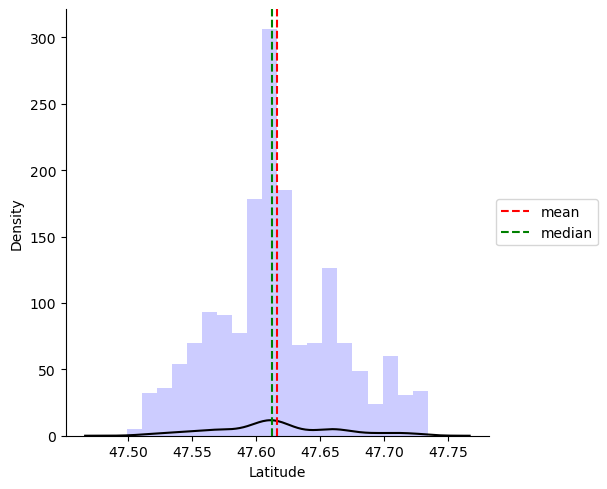

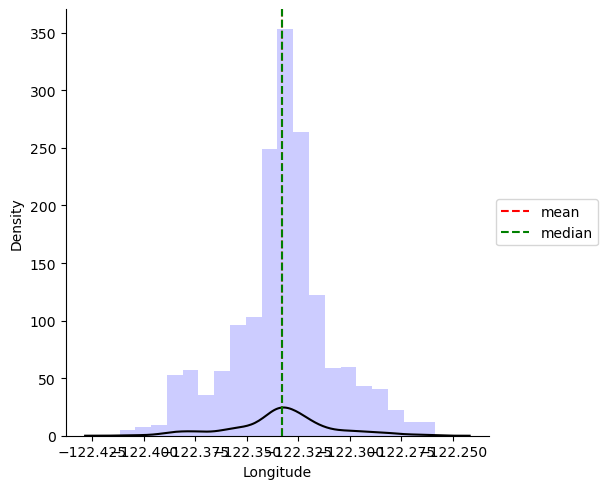

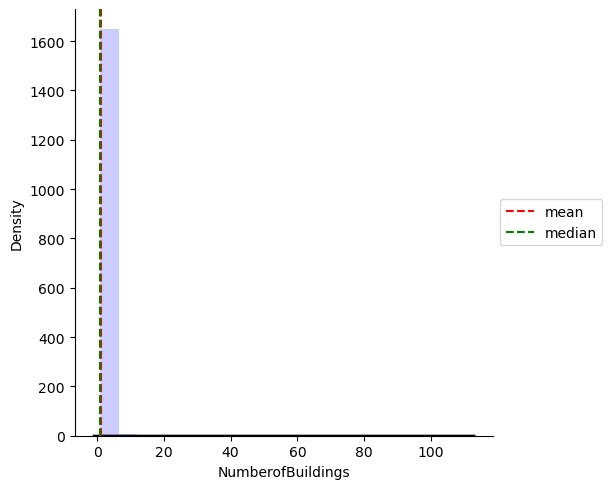

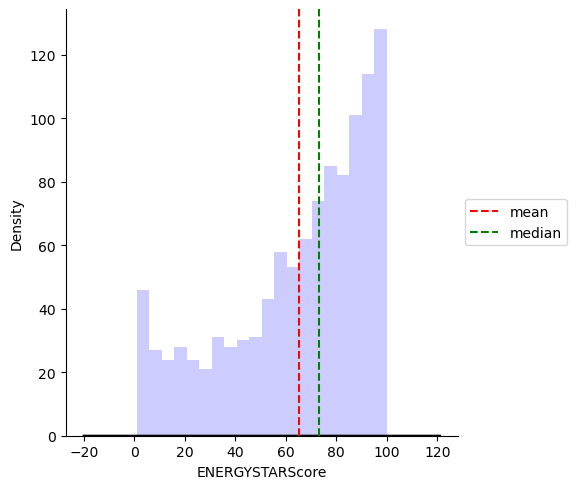

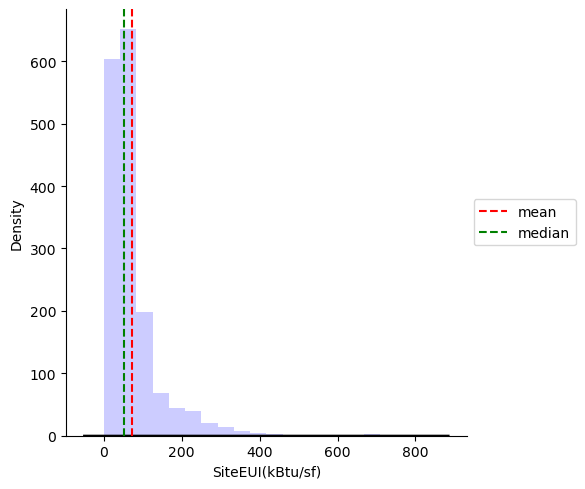

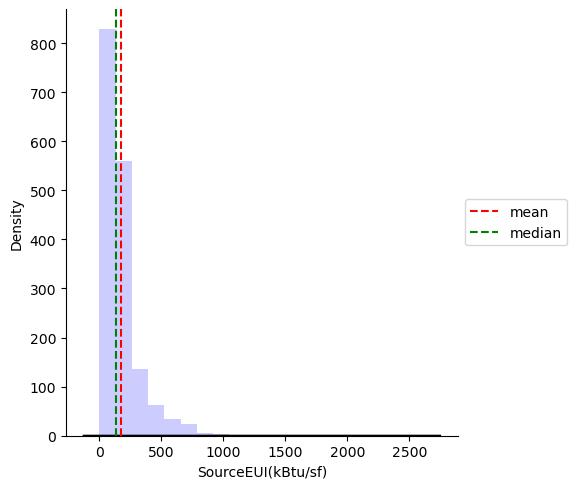

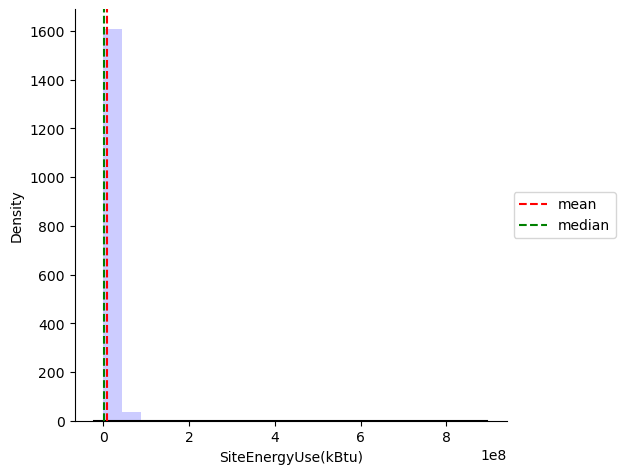

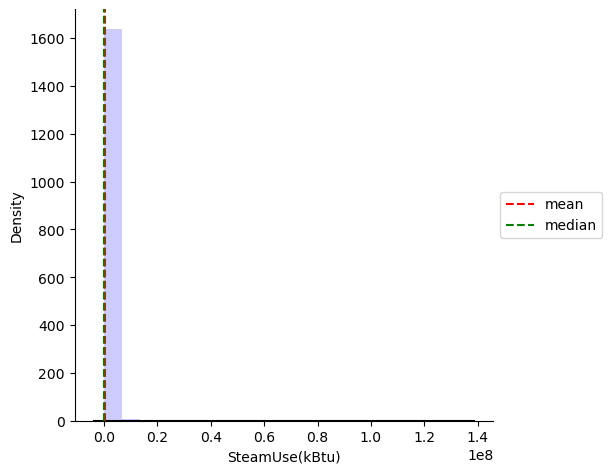

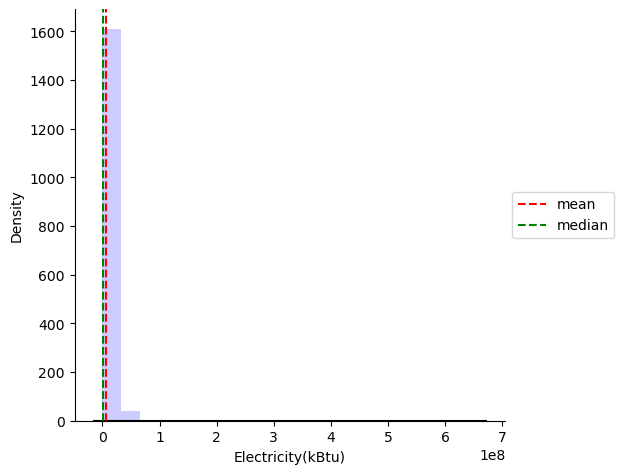

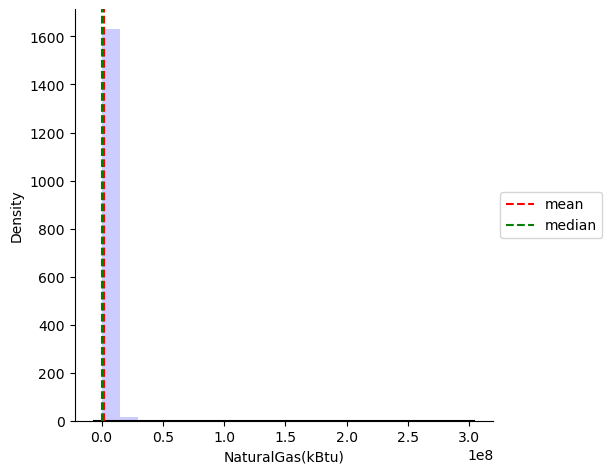

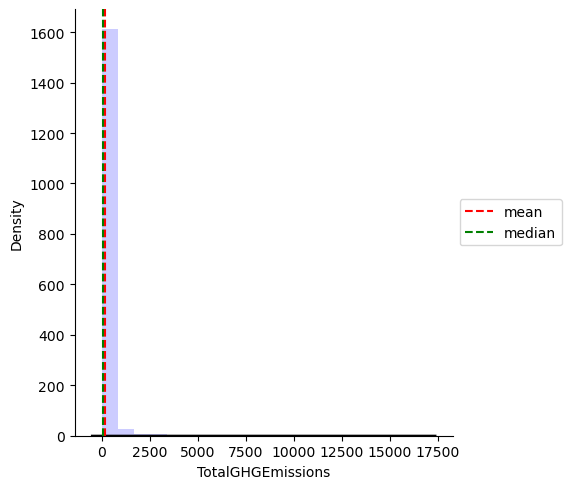

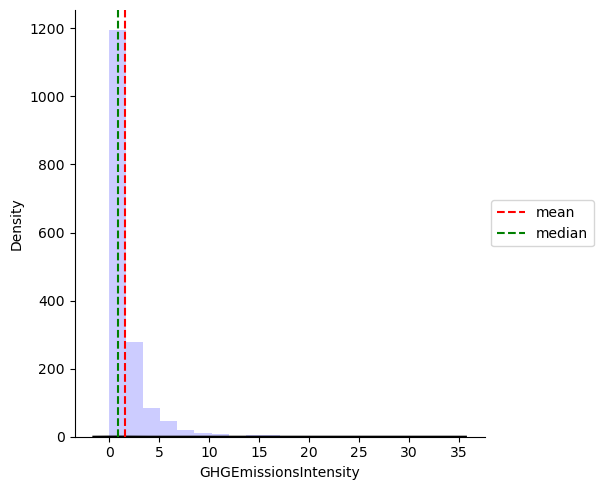

In [45]:
plot_float_columns(data4)

In [46]:
def add_correlation_heatmap(dataframe):
    plt.figure(figsize=(20, 20))
    corr = dataframe.corr(method='pearson')
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()
    return 


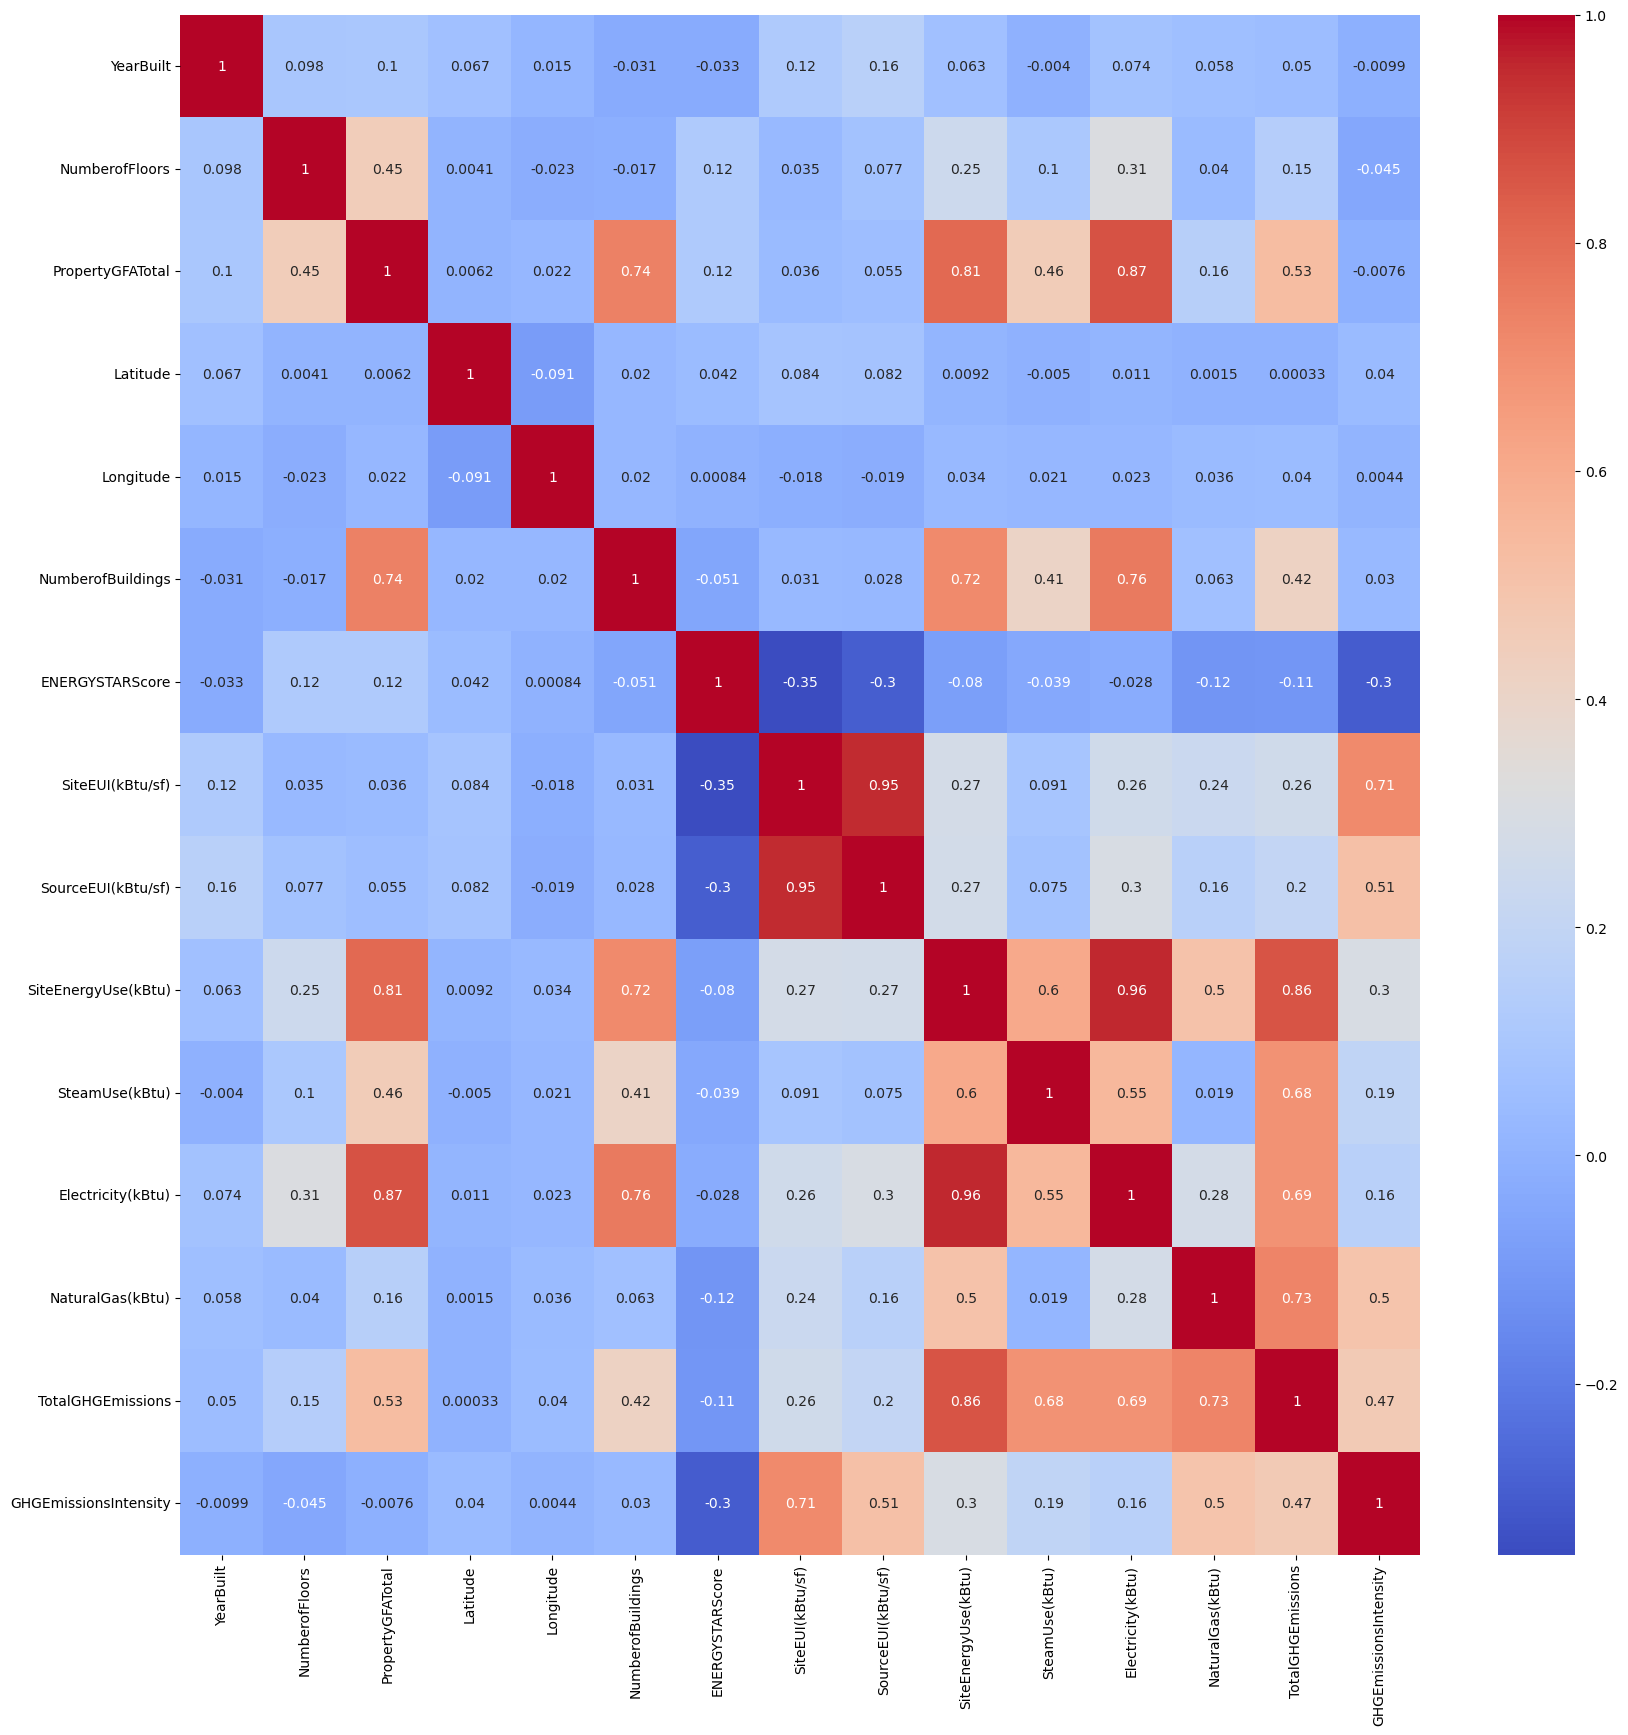

In [47]:
add_correlation_heatmap(data4)

In [48]:
data4.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')



une corrélation élevée entre deux variables, peut biaiser les prévisions. 
Cela est dû à la colinéarité, qui se produit lorsque deux variables sont fortement corrélées et ont une forte dépendance les unes des autres. Dans ce cas, il peut être difficile de déterminer avec précision la contribution individuelle de chaque variable à la variabilité dans les données.


Lors de l'analyse statistique, la colinéarité peut entraîner des incohérences dans les coefficients des modèles, des estimations imprécises et des erreurs standard élevées. Cela peut rendre difficile l'interprétation des résultats et peut même entraîner des erreurs de prévision importantes.

Par conséquent, il est important de surveiller les coefficients de corrélation entre les variables et de prendre des mesures pour gérer la colinéarité si nécessaire. 

Pour cette étude, j'ai besoin de prédire la consommation totale d'énergie des bâtiments.

Je choisis donc la variable SiteEnergyUse(kBtu) comme première cible. Il s'agit de la quantité annuelle d'énergie consommée par le bien immobilier, toutes sources d'énergie confondues. 


In [49]:
data4.drop(["SteamUse(kBtu)","SourceEUI(kBtu/sf)","SiteEUI(kBtu/sf)", 'Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity'], axis = 1, inplace= True)


C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\4061738493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(["SteamUse(kBtu)","SourceEUI(kBtu/sf)","SiteEUI(kBtu/sf)", 'Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity'], axis = 1, inplace= True)


In [50]:
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,1927,12,88434,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,60.0,7.226362e+06,249.98
1,NonResidential,Hotel,1996,11,103566,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,61.0,8.387933e+06,295.86
2,NonResidential,Hotel,1969,41,956110,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,43.0,7.258702e+07,2089.28
3,NonResidential,Hotel,1926,10,61320,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,56.0,6.794584e+06,286.43
4,NonResidential,Hotel,1980,18,175580,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1,12294,Office,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Other,2004,1,16000,Other - Recreation,DOWNTOWN,47.59625,-122.32283,1.0,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Other,1974,1,13157,Other - Recreation,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Mixed Use Property,1989,1,14101,Other - Recreation,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,7.194712e+05,22.11


In [51]:
datanormal = data4[['YearBuilt','NumberofFloors','PropertyGFATotal','Latitude','Longitude','NumberofBuildings','SiteEnergyUse(kBtu)','TotalGHGEmissions']]
datanormal

,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1927,12,88434,47.61220,-122.33799,1.0,7.226362e+06,249.98
1,1996,11,103566,47.61317,-122.33393,1.0,8.387933e+06,295.86
2,1969,41,956110,47.61393,-122.33810,1.0,7.258702e+07,2089.28
3,1926,10,61320,47.61412,-122.33664,1.0,6.794584e+06,286.43
4,1980,18,175580,47.61375,-122.34047,1.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...
3371,1990,1,12294,47.56722,-122.31154,1.0,8.497457e+05,20.94
3372,2004,1,16000,47.59625,-122.32283,1.0,9.502762e+05,32.17
3373,1974,1,13157,47.63644,-122.35784,1.0,5.765898e+06,223.54
3374,1989,1,14101,47.52832,-122.32431,1.0,7.194712e+05,22.11


In [52]:
datanormal.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,Latitude,Longitude,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1659.000000,1659.000000,1.659000e+03,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000
mean,1961.942737,4.081977,1.183975e+05,47.616040,-122.332909,1.200121,8.465501e+06,185.600964
std,32.704599,6.143384,2.964594e+05,0.048232,0.024579,2.930185,3.030433e+07,753.491328
min,1900.000000,1.000000,1.128500e+04,47.499170,-122.411820,1.000000,0.000000e+00,0.000000
25%,1930.000000,1.000000,2.950300e+04,47.585350,-122.343300,1.000000,1.238204e+06,20.085000
50%,1965.000000,2.000000,4.928000e+04,47.612340,-122.332970,1.000000,2.556131e+06,49.730000
75%,1989.000000,4.000000,1.055500e+05,47.649700,-122.321725,1.000000,6.939192e+06,142.865000
max,2015.000000,76.000000,9.320156e+06,47.733870,-122.258640,111.000000,8.739237e+08,16870.980000


In [53]:
def check_normal_distribution(data):
    # Test de Shapiro-Wilk pour vérifier si les données suivent une loi normale
    shapiro_results = stats.shapiro(data)
    if shapiro_results[1] > 0.05:
        print("Les données suivent une loi normale")
    else:
        print("Les données ne suivent pas une loi normale")
    return shapiro_results


In [54]:
check_normal_distribution(datanormal)

Les données ne suivent pas une loi normale


C:\Users\boukh\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.0593450665473938, pvalue=0.0)

il est donc inutile d'effectuer une analyse anova 

In [55]:



def kruskal_wallis_df(df, col_ref):
    results = []
    for col in df.columns:
        
        stat, p_value = kruskal(df[col_ref], df[col])
        results.append([col, stat, p_value])
    return pd.DataFrame(results, columns=['colonne', 'statistic', 'p_value'])

In [56]:
 kruskal_wallis_df(datanormal, 'NumberofFloors')

,colonne,statistic,p_value
0,YearBuilt,2.500883e+03,0.000000
1,NumberofFloors,1.898445e-12,0.999999
2,PropertyGFATotal,2.500834e+03,0.000000
3,Latitude,2.470776e+03,0.000000
4,Longitude,2.500834e+03,0.000000
5,NumberofBuildings,1.550998e+03,0.000000
6,SiteEnergyUse(kBtu),2.411205e+03,0.000000
7,TotalGHGEmissions,2.022504e+03,0.000000


lorsque p value = 0 , cela veut dire qu'il existe une relation significative entre les variables étudiées.

In [57]:

def perform_bivariate_analysis(dataframe, column1, column2):
    # Utiliser la fonction boxplot de Seaborn pour visualiser les données
    plt.figure(figsize = (20,10))
    sns.barplot(x=column2, y=column1, data=dataframe)
    plt.xticks(rotation=90) 
    plt.show()



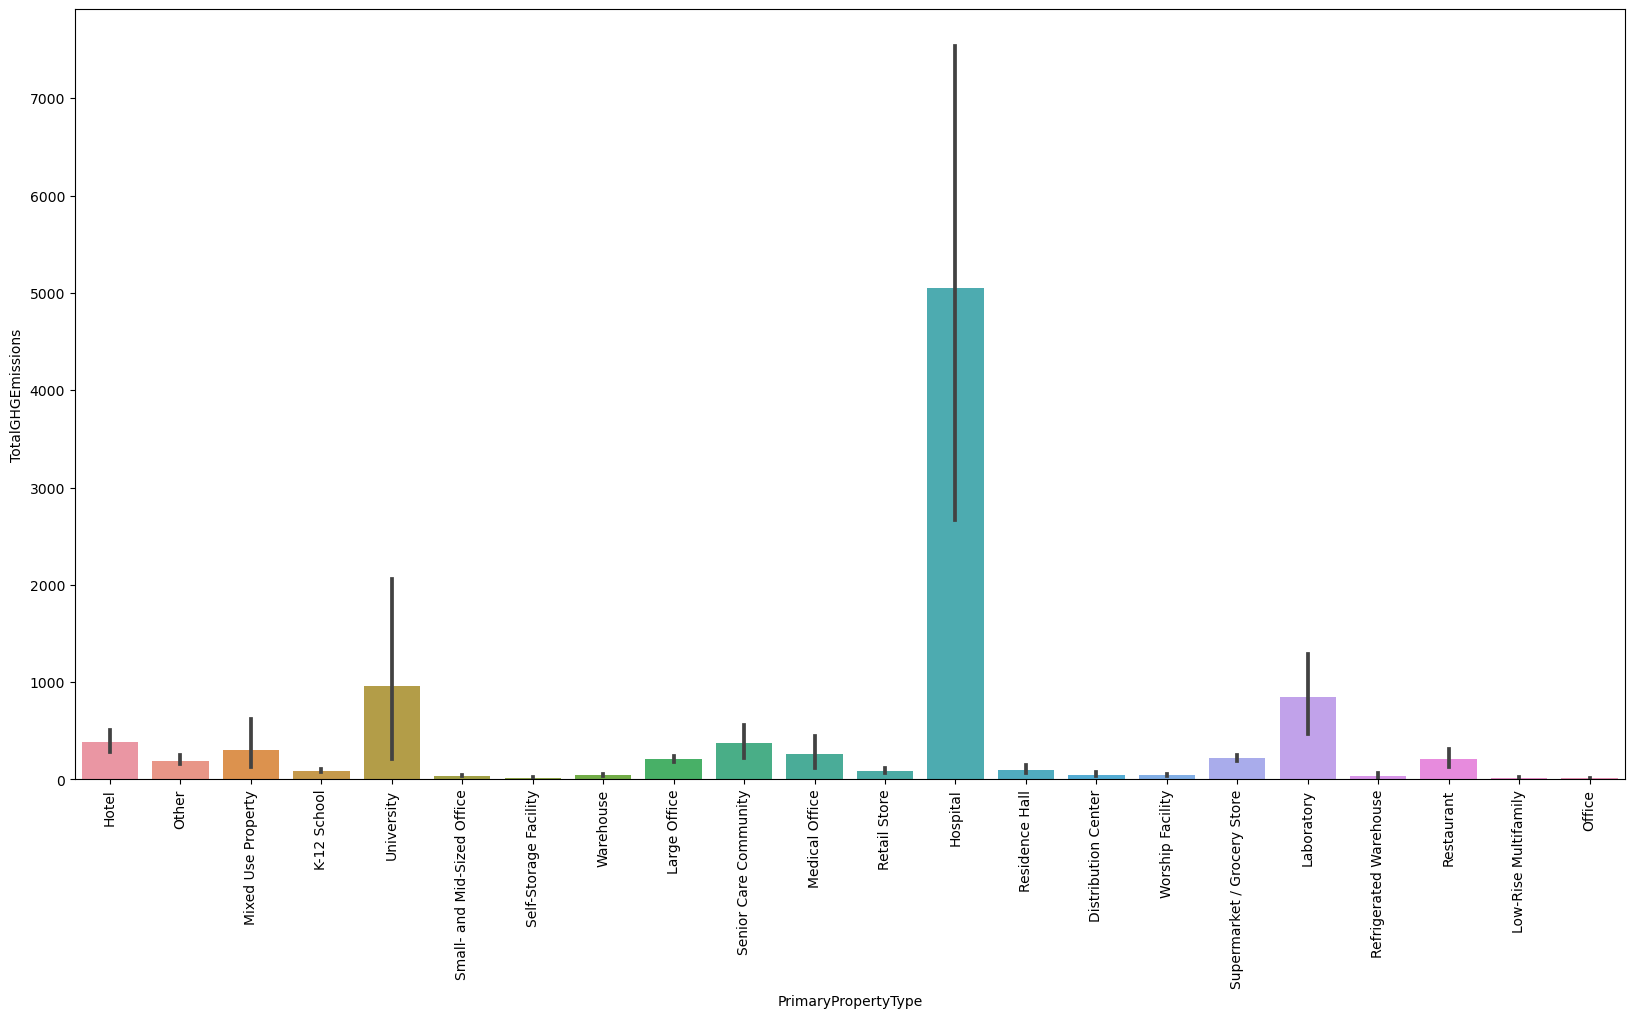

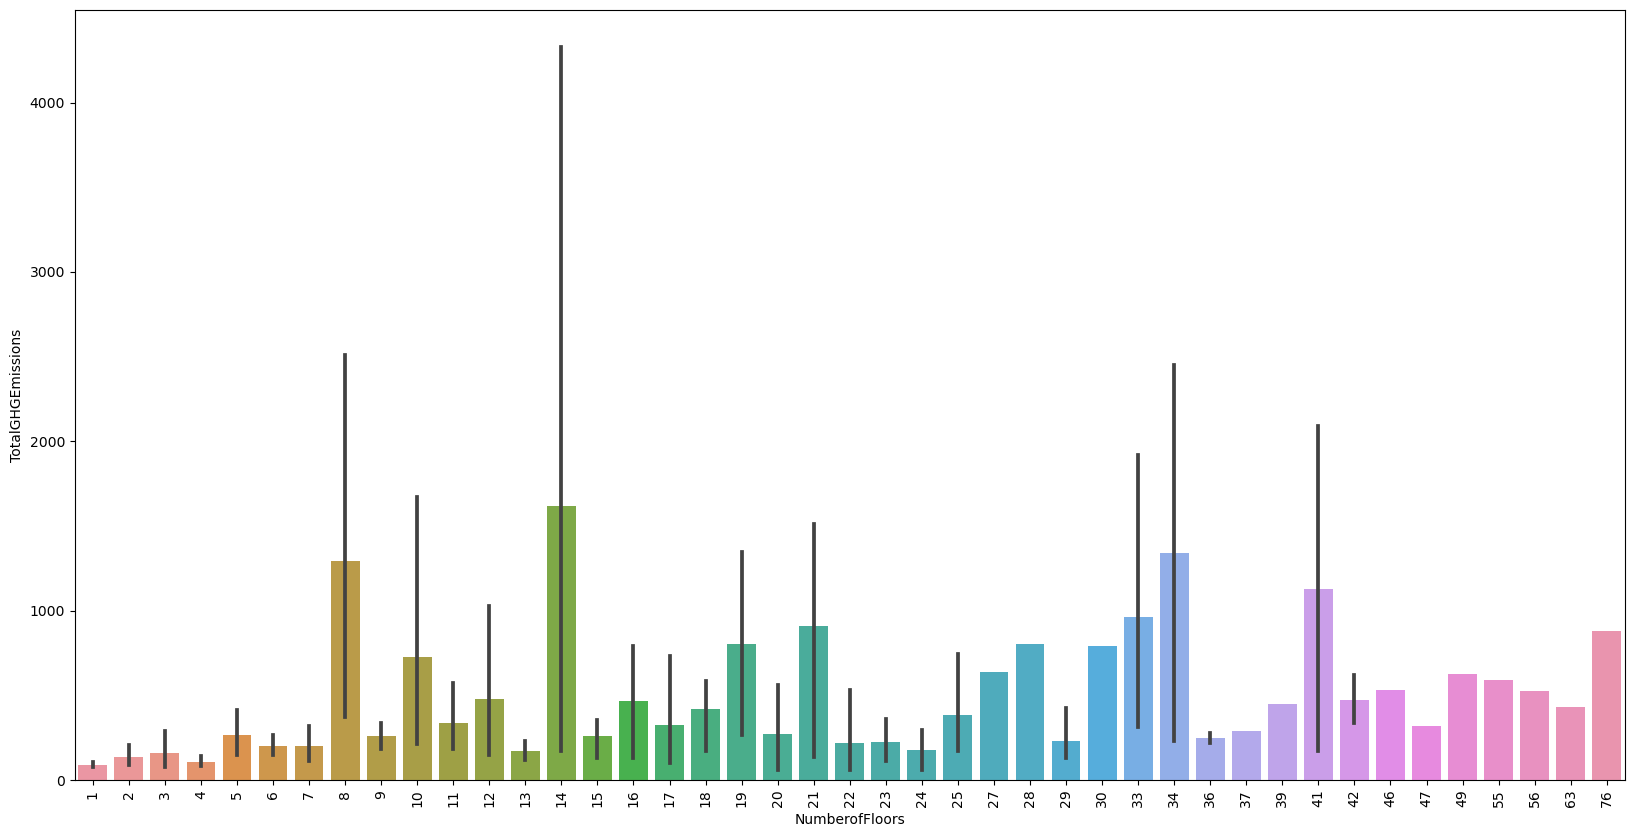

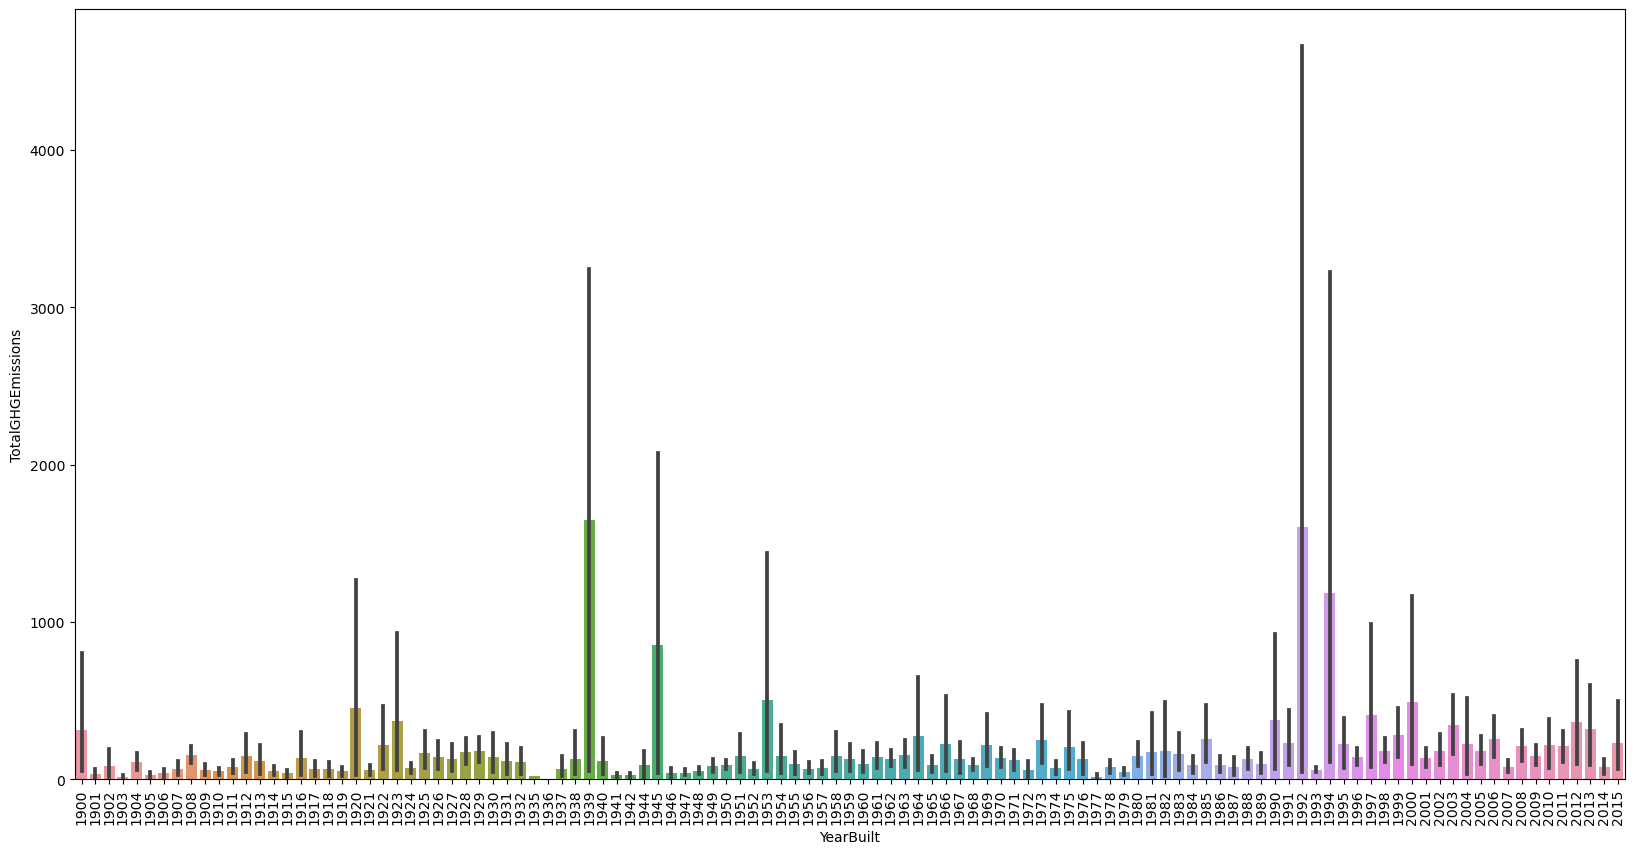

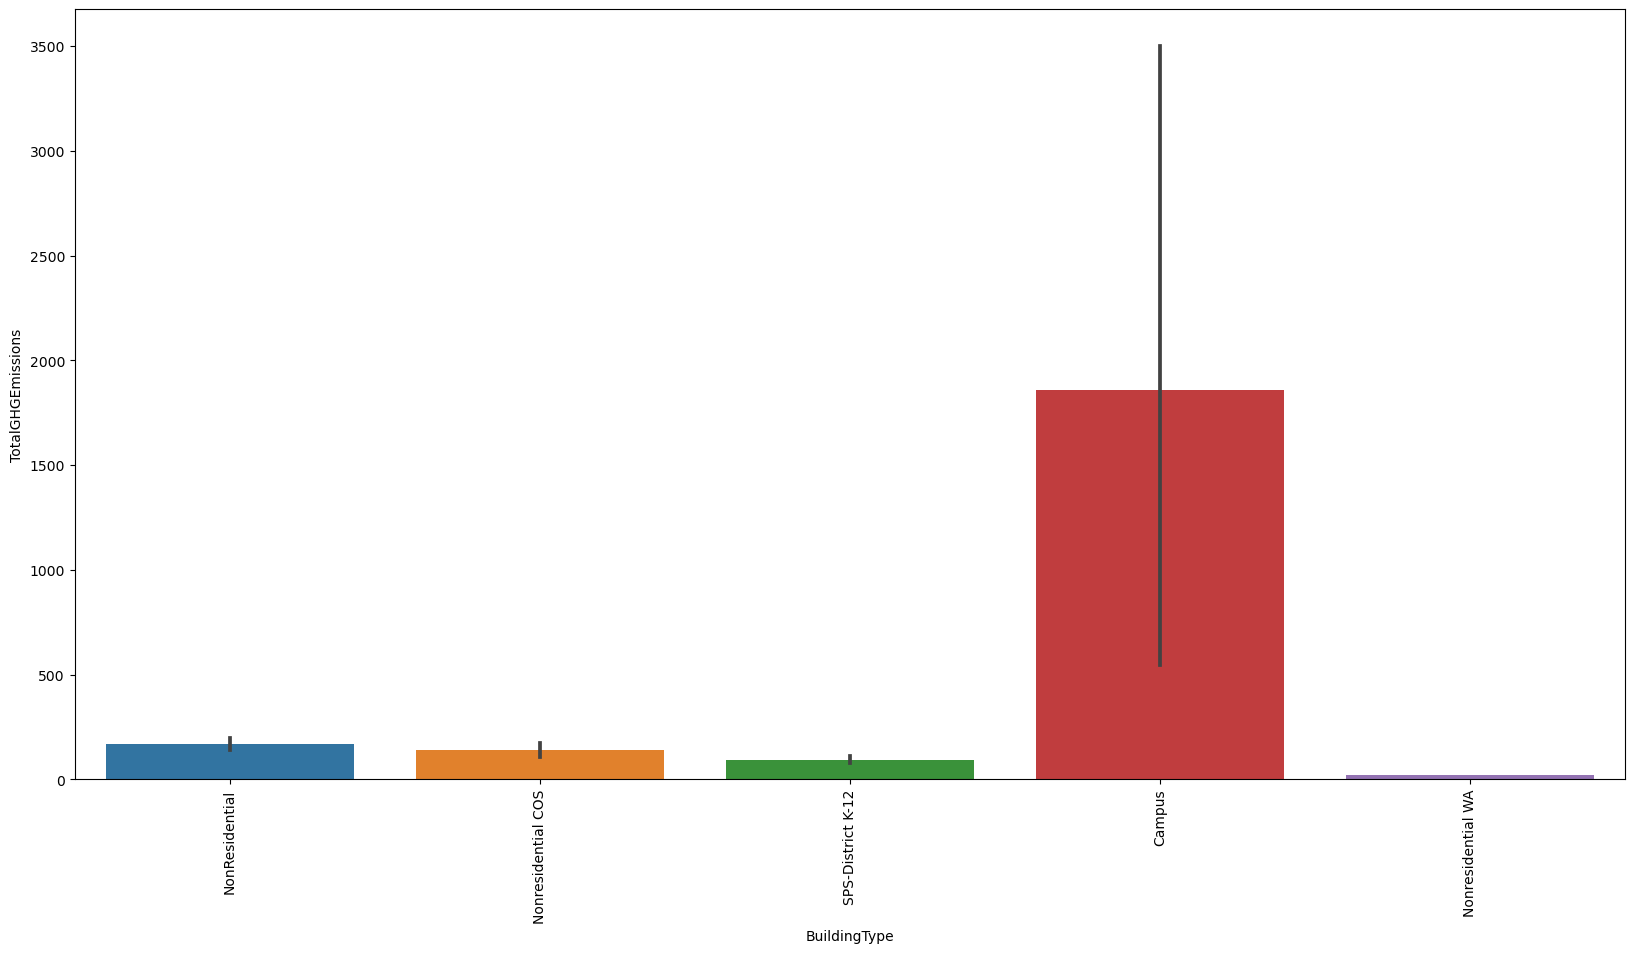

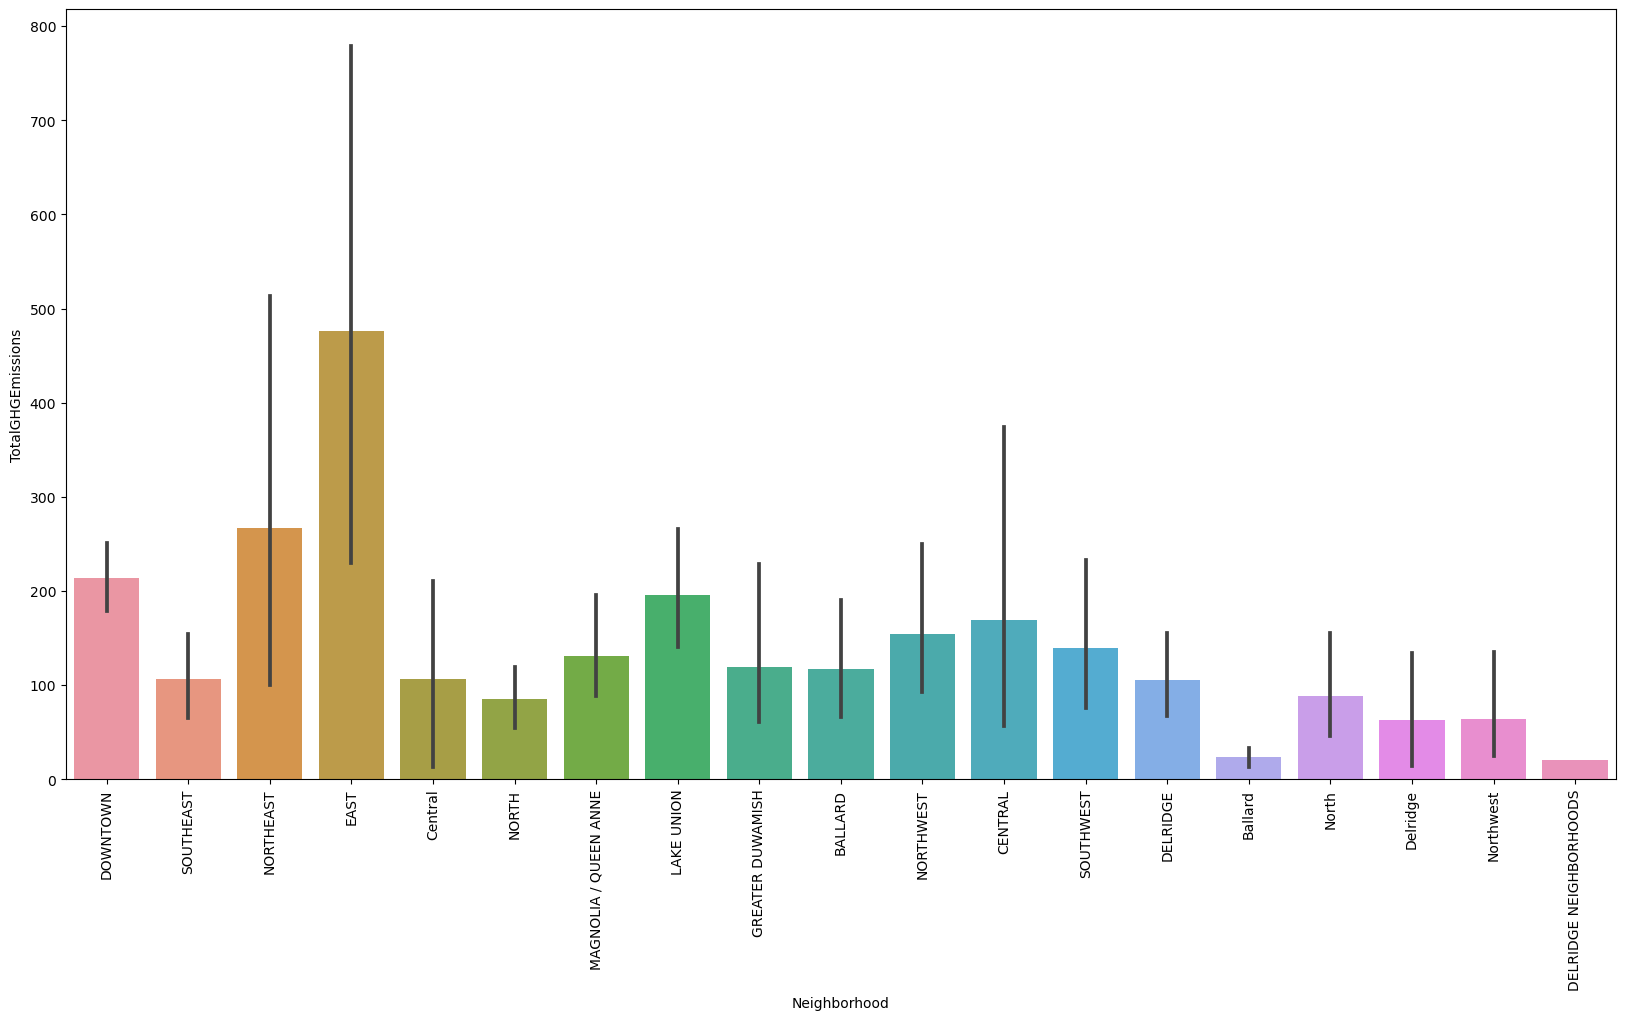

In [58]:
perform_bivariate_analysis(data4, data4['TotalGHGEmissions'],data4['PrimaryPropertyType'])
perform_bivariate_analysis(data4, data4['TotalGHGEmissions'],data4['NumberofFloors'])
perform_bivariate_analysis(data4, data4['TotalGHGEmissions'],data4['YearBuilt'])
perform_bivariate_analysis(data4, data4['TotalGHGEmissions'],data4['BuildingType'])
perform_bivariate_analysis(data4, data4['TotalGHGEmissions'],data4['Neighborhood'])

- hôpital, université et les laboratoires sont les bâtiments qui consomment le +
- la taille du bâtiment par étage a un léger impacte sur la consommation.
- l'année a aussi un léger impact.
- les campus sont le type de bâtiment qui consomme le +.

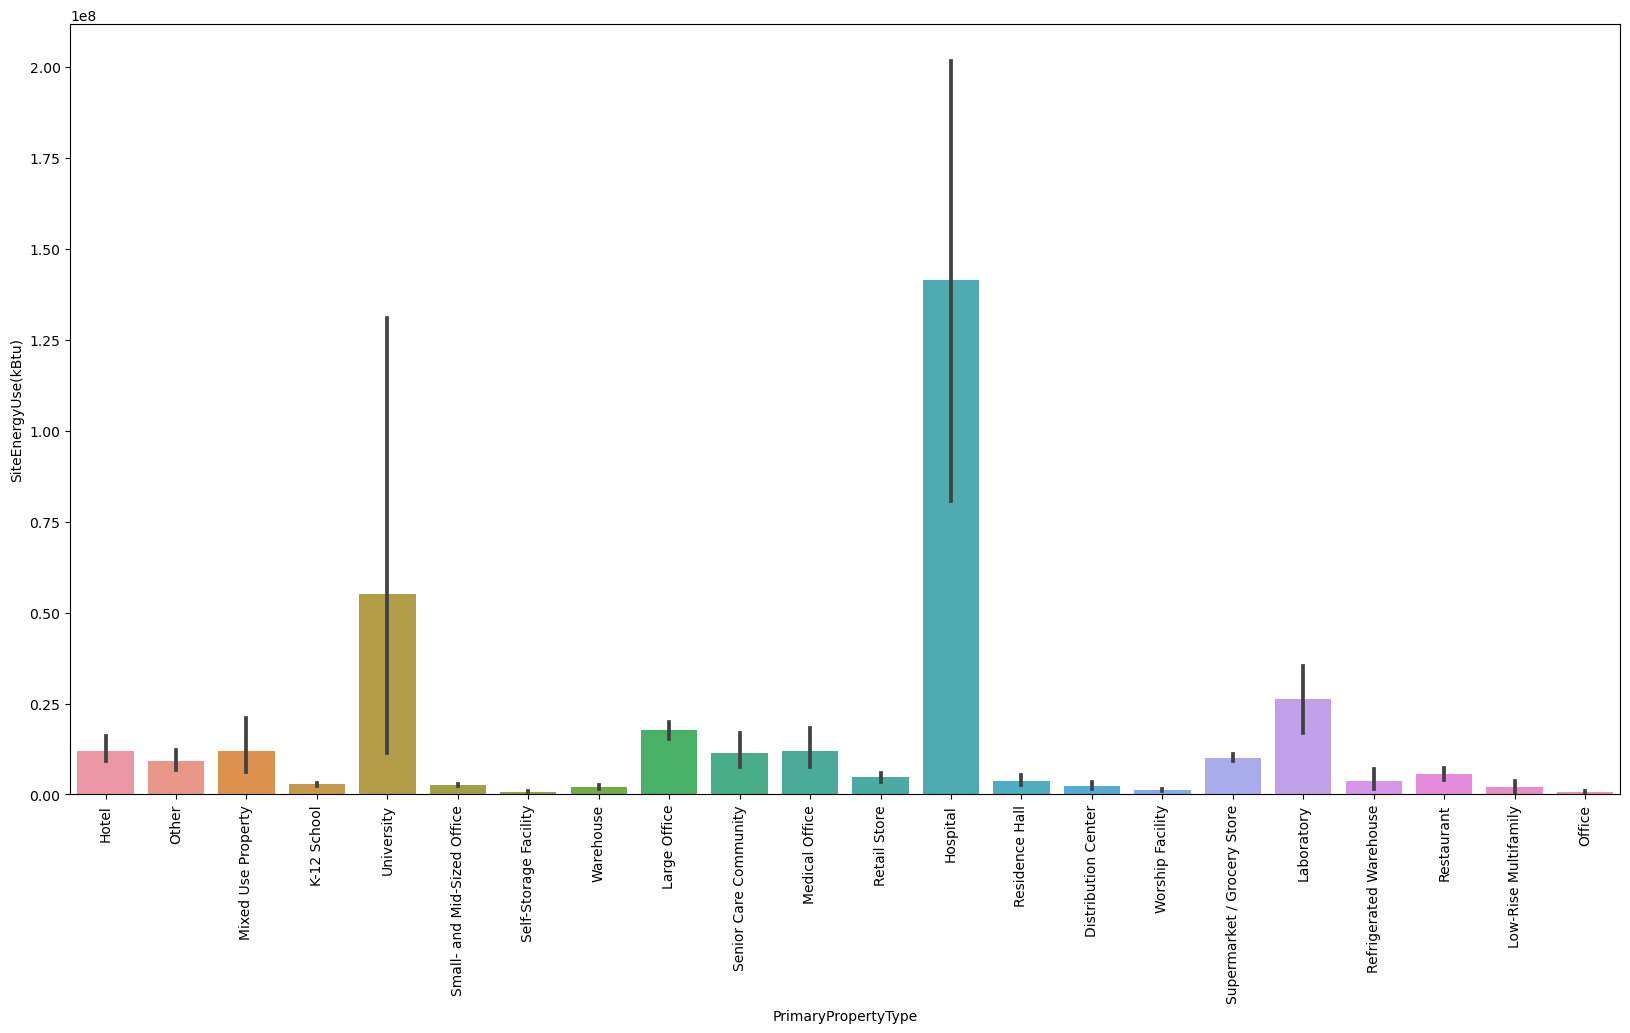

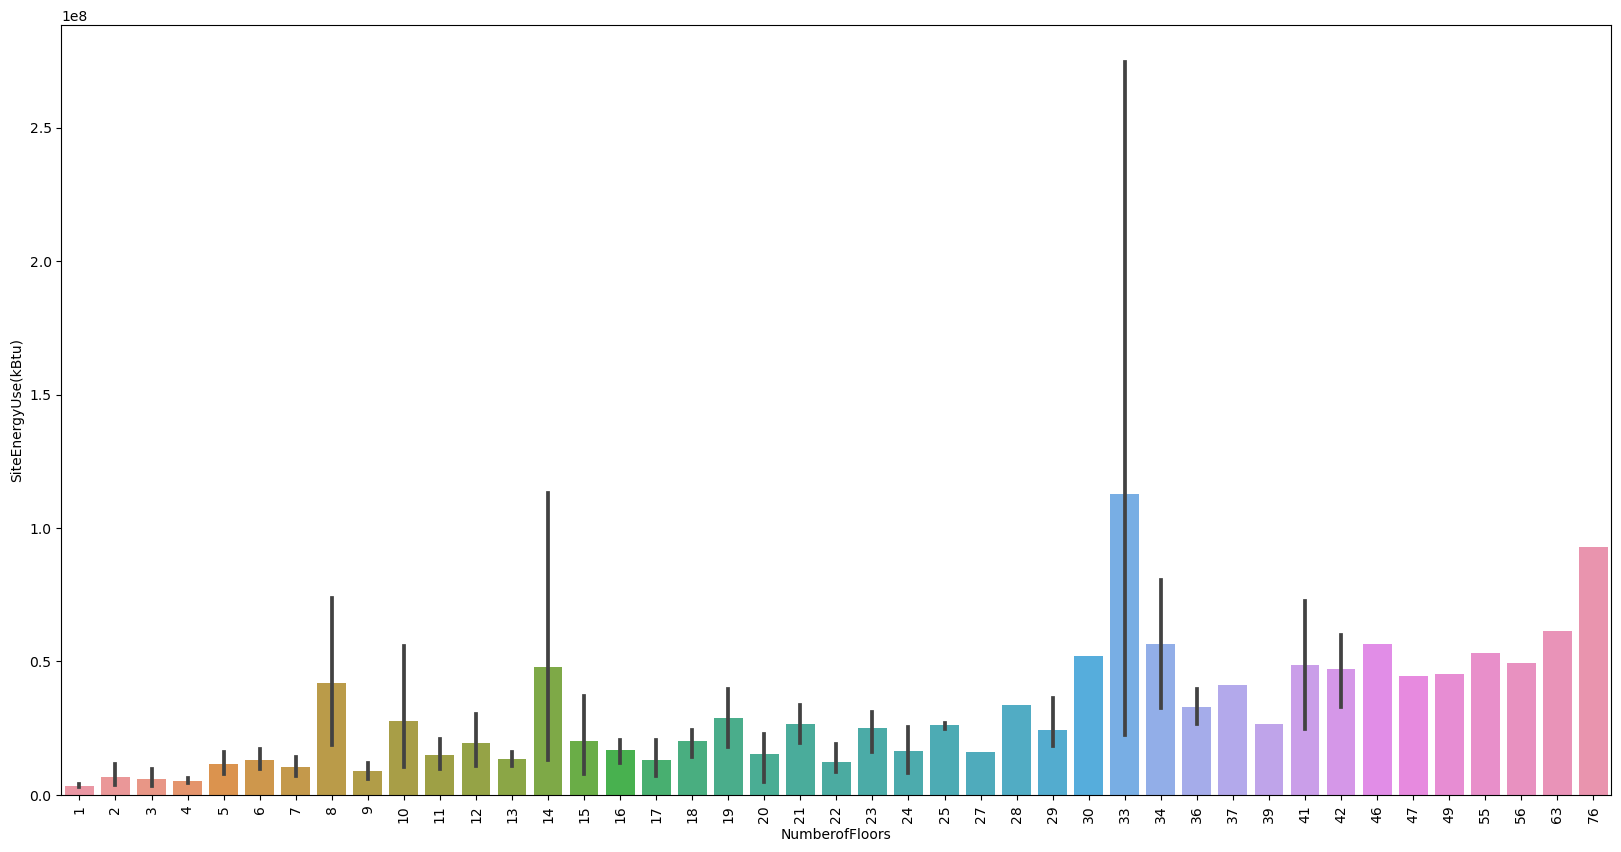

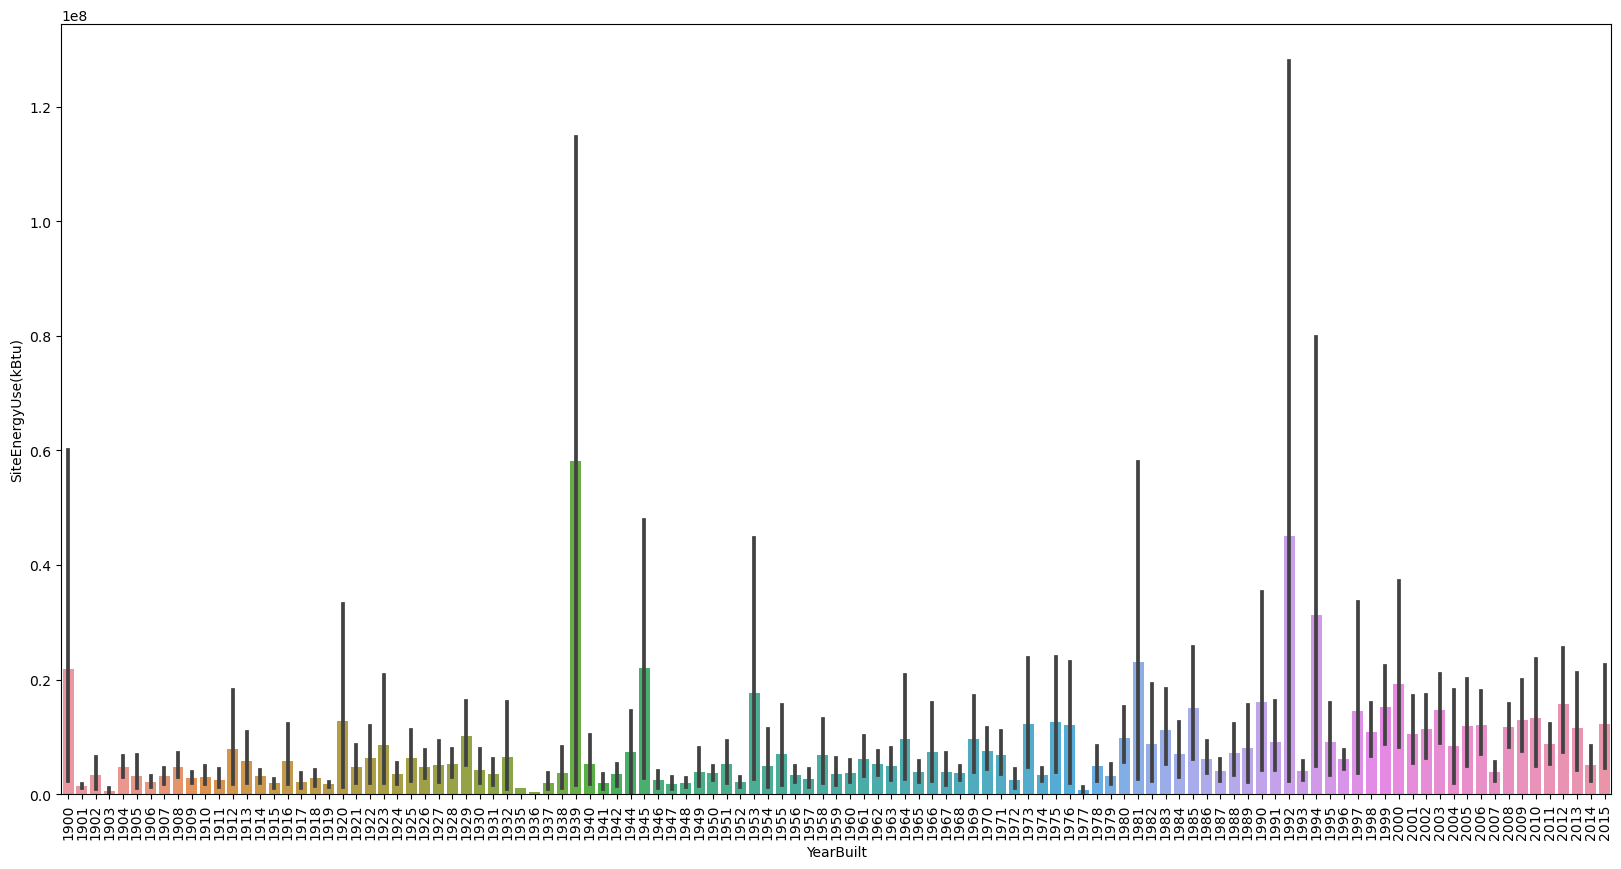

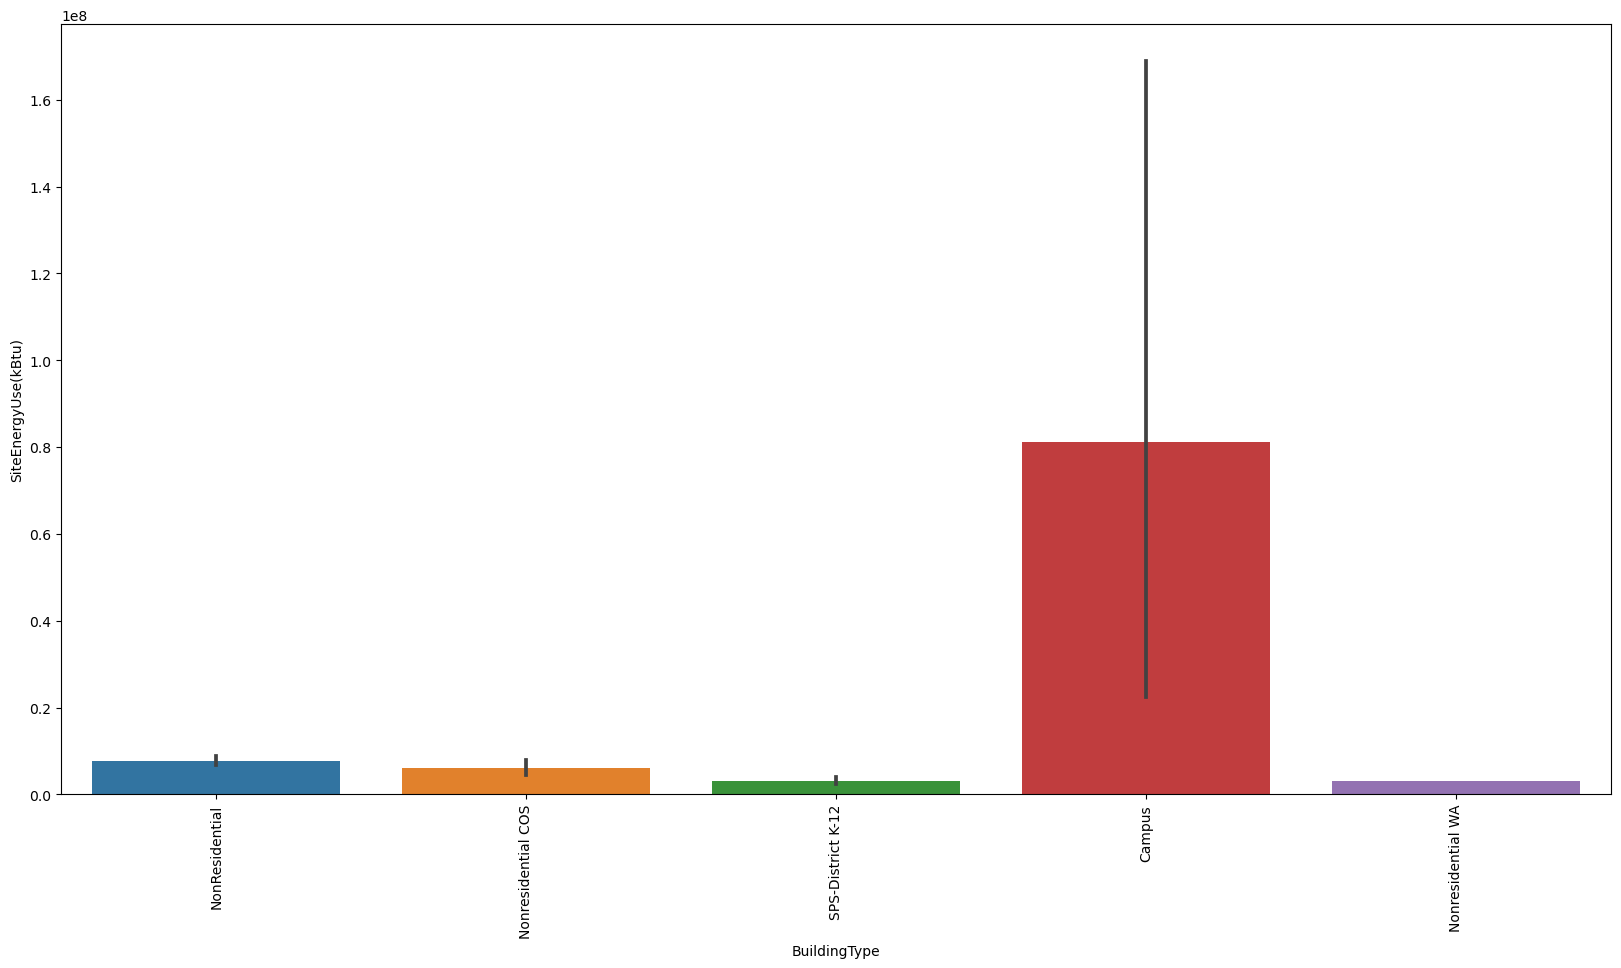

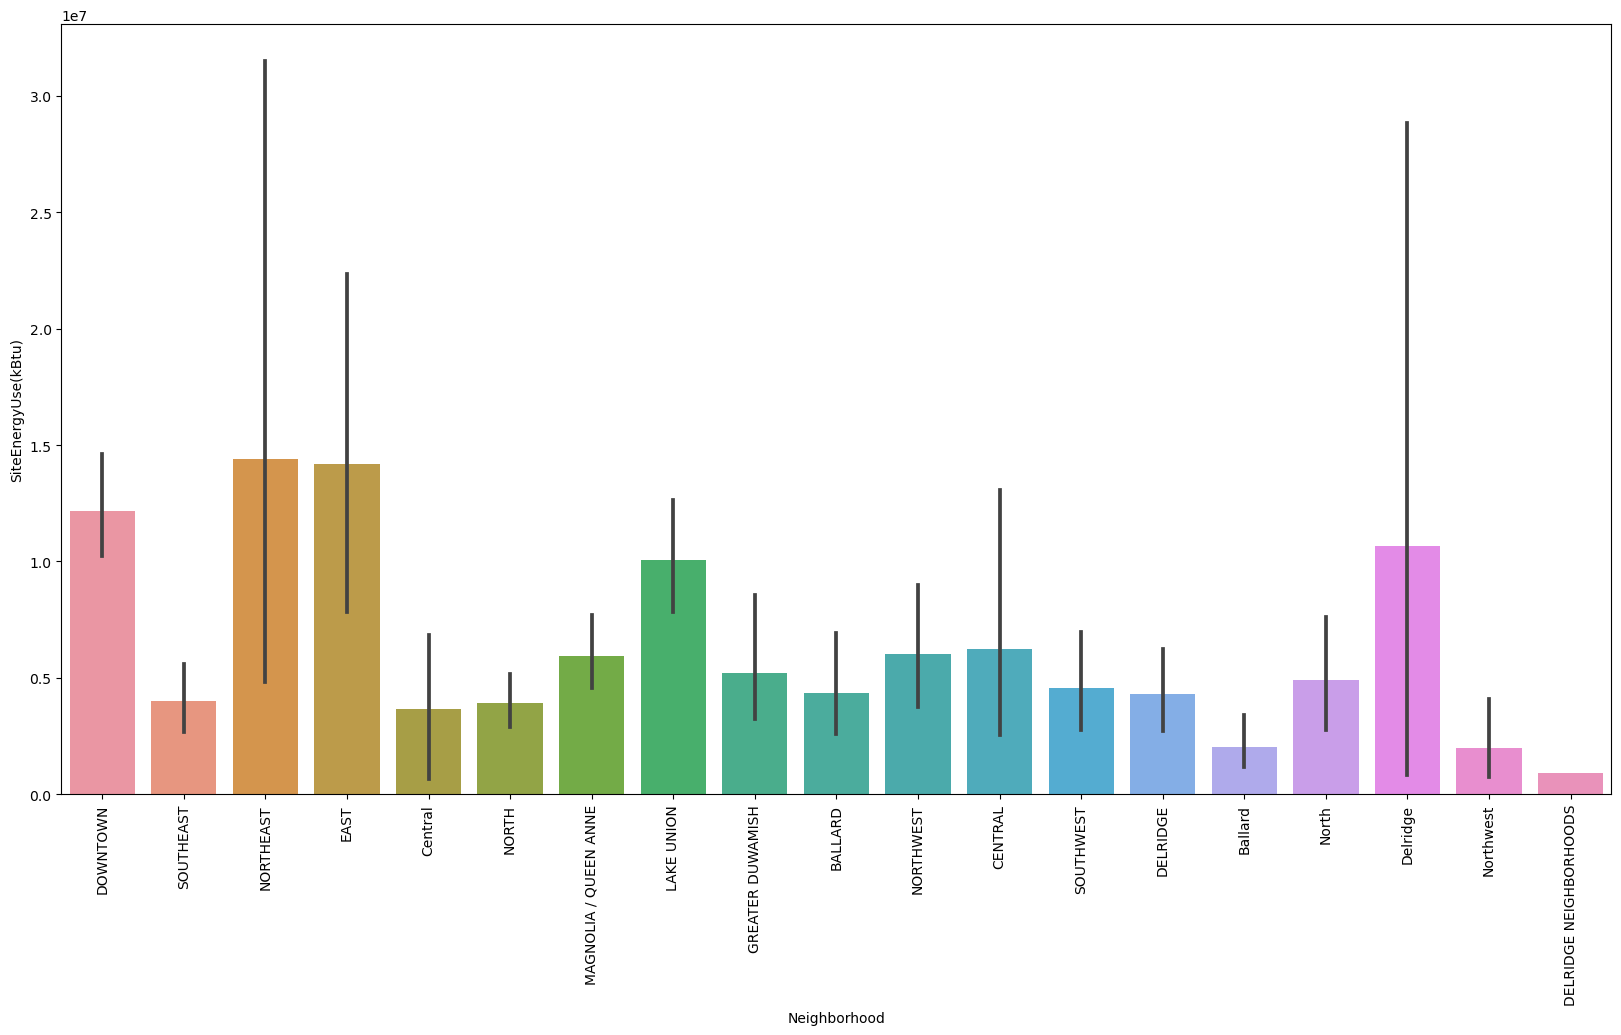

In [59]:
perform_bivariate_analysis(data4, data4['SiteEnergyUse(kBtu)'],data4['PrimaryPropertyType'])
perform_bivariate_analysis(data4, data4['SiteEnergyUse(kBtu)'],data4['NumberofFloors'])
perform_bivariate_analysis(data4, data4['SiteEnergyUse(kBtu)'],data4['YearBuilt'])
perform_bivariate_analysis(data4, data4['SiteEnergyUse(kBtu)'],data4['BuildingType'])
perform_bivariate_analysis(data4, data4['SiteEnergyUse(kBtu)'],data4['Neighborhood'])

In [60]:
col_use = data4['PrimaryPropertyType'].unique()

In [61]:
replace2 =  {#santé
            "Hospital": "Santé",
            'Senior Care Community' : "Santé",
            'Medical Office' : "Santé",
            'Laboratory' : "Santé",
    
    
            #stockage
            'Self-Storage Facility': 'Industrial',
            'Refrigerated Warehouse': 'Industrial',
            'Warehouse': 'Industrial',
            'Distribution Center': 'Industrial',
        
    
            #commerce
            'Supermarket / Grocery Store':'Commercial',
             'Retail Store' : 'Commercial',
            #hotel restaurant
        'Hotel' : 'Hotel / Restaurant',
        'Restaurant' : 'Hotel / Restaurant',
     
             # Scolaire 
             'K-12 School' : 'Scolaire',
             'University' : 'Scolaire',
             'Residence Hall' : 'Scolaire',
             
             #bureau
             'Small- and Mid-Sized Office': 'Bureau',
             'Large Office' : 'Bureau',
             'Office' : 'Bureau',

    
            # Autre
            'Other' : 'Autre',
            'Mixed Use Property' : 'Autre',
            'Worship Facility' : 'Autre',
            'Low-Rise Multifamily' : 'Autre',
    

           
         }

In [62]:
col_use2 = data4['LargestPropertyUseType'].unique()
col_use2

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other

In [63]:
replace3 ={
    
            #Santé
            
           
            'Senior Care Community' : 'Santé',
            'Medical Office' : 'Santé',
            "Hospital (General Medical & Surgical)" : "Santé",
            'Other/Specialty Hospital': 'Santé',
            'Laboratory' : 'Santé',
            'Urgent Care/Clinic/Other Outpatient' : 'Santé',
            'Residential Care Facility' : 'Santé',
            'Other/Specialty Hospital': 'Santé',
            
            
            #commerce
            'Automobile Dealership': 'Commercial',
           'Other - Mall':'Commercial',
             'Retail Store': 'Commercial',
            'Supermarket/Grocery Store':'Commercial',

            'Strip Mall': 'Commercial',
            'Wholesale Club/Supercenter':'Commercial',
            
    
                        #stockage
            'Non-Refrigerated Warehouse': 'Industrial',
            'Distribution Center': 'Industrial',
            'Data Center': 'Industrial',
            'Refrigerated Warehouse': 'industrial',
            'Manufacturing/Industrial Plant': 'Industrial', 
            
            #services
            'Self-Storage Facility':'Service',
            'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Service',
            
            'Other - Services': 'Service',
            'Bank Branch': 'Service',
            'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Service',
            
            
            #habitation
            'Other - Lodging/Residential': 'Residential',

            
            'Multifamily Housing' : 'Residential',
            
            'Residence Hall/Dormitory': 'Residential',
                
            #bureaux
    
            'Office' : 'Bureau',
            'Financial Office' : 'Bureau',
            #Scolaire
            'K-12 School': 'Scolaire',
            'College/University' : 'Scolaire',
            'Other - Education' : 'Scolaire',
            'Adult Education':'Scolaire',
            'Pre-school/Daycare': 'Scolaire',
          
           
            #services publiques
            'Library':'Public',
            'Police Station': "Public",
            'Courthouse': 'Public',
            'Other - Public Services': 'Public',
            'Fire Station' : 'Public',
              'Other - Utility' : 'Public',
            
            #Autre 
            'Other' : 'Autre', 
            'Parking' : 'Autre',
         'Worship Facility' : 'Autre',
        'Prison/Incarceration' : 'Autre',
    
            
            #hotel restaurant
            'Restaurant':  'Hotel / Restaurant',
            'Hotel':  'Hotel / Restaurant',
            'Other - Restaurant/Bar': 'Hotel / Restaurant',
            'Food Service': 'Hotel / Restaurant',
            
            
            #Loisirs
            'Other - Entertainment/Public Assembly' : 'Loisirs',
            'Fitness Center/Health Club/Gym':'Loisirs',
            'Social/Meeting Hall' : 'Loisirs',
            'Museum': 'Loisirs',
            'Convention Center': 'Loisirs',
            'Other - Recreation' : 'Loisirs',
            'Lifestyle Center': 'Loisirs',
            'Movie Theater': 'Loisirs',
               'Performing Arts': 'Loisirs'
        
            
           }

In [64]:
data4['LargestPropertyUseType'] =  data4['LargestPropertyUseType'].replace(replace3)



C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\1826987888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['LargestPropertyUseType'] =  data4['LargestPropertyUseType'].replace(replace3)


In [65]:
data4['PrimaryPropertyType'] =  data4['PrimaryPropertyType'].replace(replace2)
data4


C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\494579798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['PrimaryPropertyType'] =  data4['PrimaryPropertyType'].replace(replace2)


,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,47.61220,-122.33799,1.0,60.0,7.226362e+06,249.98
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,47.61317,-122.33393,1.0,61.0,8.387933e+06,295.86
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,47.61393,-122.33810,1.0,43.0,7.258702e+07,2089.28
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,47.61412,-122.33664,1.0,56.0,6.794584e+06,286.43
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,47.61375,-122.34047,1.0,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,47.59625,-122.32283,1.0,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,7.194712e+05,22.11


In [66]:
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,47.61220,-122.33799,1.0,60.0,7.226362e+06,249.98
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,47.61317,-122.33393,1.0,61.0,8.387933e+06,295.86
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,47.61393,-122.33810,1.0,43.0,7.258702e+07,2089.28
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,47.61412,-122.33664,1.0,56.0,6.794584e+06,286.43
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,47.61375,-122.34047,1.0,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,47.59625,-122.32283,1.0,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,7.194712e+05,22.11


In [67]:

def calculate_distance(row):
    seattle_center = (47.6025, -122.35147)
    location = (row['Latitude'], row['Longitude'])
    distance = geopy.distance.distance(seattle_center, location).km
    return distance



In [68]:
data4['distance'] = data4.apply(calculate_distance, axis=1)


C:\Users\boukh\AppData\Local\Temp\ipykernel_14096\2806873714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['distance'] = data4.apply(calculate_distance, axis=1)


In [69]:
data4

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,distance
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,47.61220,-122.33799,1.0,60.0,7.226362e+06,249.98,1.480001
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,47.61317,-122.33393,1.0,61.0,8.387933e+06,295.86,1.773875
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,47.61393,-122.33810,1.0,43.0,7.258702e+07,2089.28,1.620355
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,47.61412,-122.33664,1.0,56.0,6.794584e+06,286.43,1.706588
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,47.61375,-122.34047,1.0,75.0,1.417261e+07,505.01,1.499523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,47.56722,-122.31154,1.0,46.0,8.497457e+05,20.94,4.940425
3372,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,47.59625,-122.32283,1.0,NaN,9.502762e+05,32.17,2.263090
3373,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,NaN,5.765898e+06,223.54,3.803809
3374,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,47.52832,-122.32431,1.0,NaN,7.194712e+05,22.11,8.496931


In [70]:

encoder = OneHotEncoder()

one_hot = pd.get_dummies(data4['LargestPropertyUseType'])


# Concaténer la trame de données d'origine et la trame de données encodée
df2 = pd.concat([data4, one_hot], axis=1)
df2

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,Latitude,Longitude,NumberofBuildings,...,Commercial,Hotel / Restaurant,Industrial,Loisirs,Public,Residential,Santé,Scolaire,Service,industrial
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,47.61220,-122.33799,1.0,...,0,1,0,0,0,0,0,0,0,0
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,47.61317,-122.33393,1.0,...,0,1,0,0,0,0,0,0,0,0
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,47.61393,-122.33810,1.0,...,0,1,0,0,0,0,0,0,0,0
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,47.61412,-122.33664,1.0,...,0,1,0,0,0,0,0,0,0,0
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,47.61375,-122.34047,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,47.56722,-122.31154,1.0,...,0,0,0,0,0,0,0,0,0,0
3372,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,47.59625,-122.32283,1.0,...,0,0,0,1,0,0,0,0,0,0
3373,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,...,0,0,0,1,0,0,0,0,0,0
3374,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,47.52832,-122.32431,1.0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
df2.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'distance', 'Autre',
       'Bureau', 'Commercial', 'Hotel / Restaurant', 'Industrial', 'Loisirs',
       'Public', 'Residential', 'Santé', 'Scolaire', 'Service', 'industrial'],
      dtype='object')

In [72]:
df_final = df2.drop(['Latitude', 'Longitude'], axis=1)


In [73]:
df_final

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),...,Commercial,Hotel / Restaurant,Industrial,Loisirs,Public,Residential,Santé,Scolaire,Service,industrial
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,1.0,60.0,7.226362e+06,...,0,1,0,0,0,0,0,0,0,0
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,1.0,61.0,8.387933e+06,...,0,1,0,0,0,0,0,0,0,0
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,1.0,43.0,7.258702e+07,...,0,1,0,0,0,0,0,0,0,0
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,1.0,56.0,6.794584e+06,...,0,1,0,0,0,0,0,0,0,0
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,1.0,75.0,1.417261e+07,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,1.0,46.0,8.497457e+05,...,0,0,0,0,0,0,0,0,0,0
3372,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,1.0,NaN,9.502762e+05,...,0,0,0,1,0,0,0,0,0,0
3373,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,1.0,NaN,5.765898e+06,...,0,0,0,1,0,0,0,0,0,0
3374,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,1.0,NaN,7.194712e+05,...,0,0,0,1,0,0,0,0,0,0


In [74]:
df_final.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType', 'Neighborhood',
       'NumberofBuildings', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'distance', 'Autre', 'Bureau', 'Commercial',
       'Hotel / Restaurant', 'Industrial', 'Loisirs', 'Public', 'Residential',
       'Santé', 'Scolaire', 'Service', 'industrial'],
      dtype='object')

In [75]:
df_final.shape

(1659, 24)

In [76]:
missing_values_by_column1(df_final)

BuildingType                0
PrimaryPropertyType         0
YearBuilt                   0
NumberofFloors              0
PropertyGFATotal            0
LargestPropertyUseType      0
Neighborhood                0
NumberofBuildings           0
ENERGYSTARScore           569
SiteEnergyUse(kBtu)         0
TotalGHGEmissions           0
distance                    0
Autre                       0
Bureau                      0
Commercial                  0
Hotel / Restaurant          0
Industrial                  0
Loisirs                     0
Public                      0
Residential                 0
Santé                       0
Scolaire                    0
Service                     0
industrial                  0
dtype: int64

In [77]:
df_final.to_csv("2016_Building_Energy_Benchmarking_clean.csv")
